<a href="https://colab.research.google.com/github/MayaLegersky/Astro5205Group1/blob/project-1/5205_Project1_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/MayaLegersky/Astro5205Group1/blob/project-1/5205_Project1_12925.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Part I**

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.ascii
import astropy.units as u
import astropy.constants as ac

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
dat=astropy.io.ascii.read("/content/drive/My Drive/5205_Project1_Data.csv")
dat.columns

<TableColumns names=('pl_name','hostname','default_flag','sy_snum','sy_pnum','discoverymethod','disc_year','disc_facility','soltype','pl_controv_flag','pl_refname','pl_orbper','pl_orbpererr1','pl_orbpererr2','pl_orbperlim','pl_orbsmax','pl_orbsmaxerr1','pl_orbsmaxerr2','pl_orbsmaxlim','pl_rade','pl_radeerr1','pl_radeerr2','pl_radelim','pl_radj','pl_radjerr1','pl_radjerr2','pl_radjlim','pl_bmasse','pl_bmasseerr1','pl_bmasseerr2','pl_bmasselim','pl_bmassj','pl_bmassjerr1','pl_bmassjerr2','pl_bmassjlim','pl_bmassprov','pl_orbeccen','pl_orbeccenerr1','pl_orbeccenerr2','pl_orbeccenlim','pl_insol','pl_insolerr1','pl_insolerr2','pl_insollim','pl_eqt','pl_eqterr1','pl_eqterr2','pl_eqtlim','ttv_flag','st_refname','st_spectype','st_teff','st_tefferr1','st_tefferr2','st_tefflim','st_rad','st_raderr1','st_raderr2','st_radlim','st_mass','st_masserr1','st_masserr2','st_masslim','st_met','st_meterr1','st_meterr2','st_metlim','st_metratio','st_logg','st_loggerr1','st_loggerr2','st_logglim','sy_refname

In [14]:
#plots done by Dasha
cutp=50000
mass=dat['pl_bmasse'][(dat['pl_orbper']<=cutp) & (dat['pl_bmasse']<=7000)] #i think this is mass in earth units
radius=dat['pl_rade'][(dat['pl_orbper']<=cutp) & (dat['pl_bmasse']<=7000)] #radius in R_E?
period=dat['pl_orbper'][(dat['pl_orbper']<=cutp) & (dat['pl_bmasse']<=7000)] #days
a=dat['pl_orbsmax'][(dat['pl_orbper']<=cutp) & (dat['pl_bmasse']<=7000)] #au

#solar system
solmass=np.array([0.0553,0.815,1,0.107,317.8,95.2,14.5,17.1]) #earth mass
solradius=np.array([0.383,0.949,2,0.532,11.21,9.45,4.01,3.88])/2 #radii in earth units (nasa gave diameter)
solperiod=np.array([0.241,0.615,1,1.88,11.9,29.4,83.7,163.7])*364.2422 #period in days (nasa gave years)
sola=np.array([0.327,0.783,1,1.52,5.2,9.57,19.17,30.18]) #au

#misc
mstar_avg=np.mean(dat['st_mass'][(dat['pl_orbper']<=cutp) & (dat['pl_bmasse']<=7000)])
rstar_avg=np.mean(dat['st_rad'][(dat['pl_orbper']<=cutp) & (dat['pl_bmasse']<=7000)])
dist_avg=np.mean(dat['sy_dist'][(dat['pl_orbper']<=cutp) & (dat['pl_bmasse']<=7000)])
e_avg=np.mean(dat['pl_orbeccen'][(dat['pl_orbper']<=cutp) & (dat['pl_bmasse']<=7000)])

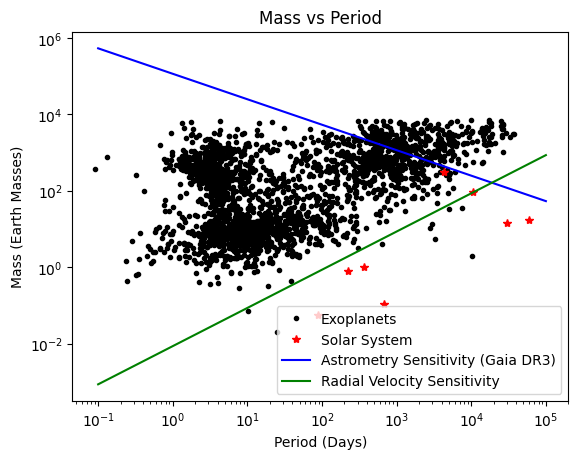

In [15]:
plt.plot(period,mass,'.k', label='Exoplanets')
plt.plot(solperiod,solmass,'r*', label='Solar System')
plt.xlabel('Period (Days)')
plt.ylabel('Mass (Earth Masses)')
plt.xscale('log')
plt.yscale('log')
plt.title('Mass vs Period')
plt.legend()
Parr=10**(np.linspace(-1,5))
mp=1*u.mas/(0.3*u.uas)*mstar_avg**(2/3)*(Parr/365.2422)**-(2/3)*(dist_avg)**1
plt.plot(Parr,mp,c='blue', label='Astrometry Sensitivity (Gaia DR3)')



m_p_arr = 0.5 * u.meter / u.second * mstar_avg*u.Msun * np.sqrt((Parr/365.2422)**2/3*u.AU / ac.G / (mstar_avg*u.Msun))

plt.plot(Parr,m_p_arr.decompose().to(u.earthMass),c='green', label='Radial Velocity Sensitivity')
plt.legend()

https://www.cosmos.esa.int/web/gaia/dr3

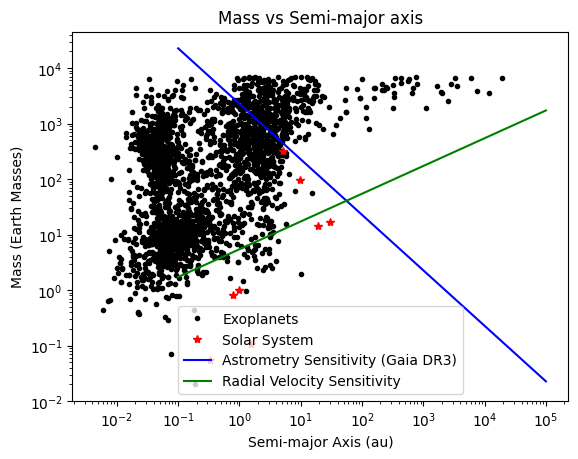

In [16]:
plt.plot(a,mass,'.k',label='Exoplanets')
plt.plot(sola,solmass,'r*',label='Solar System')

plt.xlabel('Semi-major Axis (au)')
plt.ylabel('Mass (Earth Masses)')
plt.xscale('log')
plt.yscale('log')
plt.title('Mass vs Semi-major axis')

aarr=10**(np.linspace(-1,5))*u.AU
ma=1*u.mas/(0.3*u.uas)*mstar_avg**(2/3)*aarr**-(1)*(dist_avg)**1
plt.plot(aarr,ma,c='b',label='Astrometry Sensitivity (Gaia DR3)')


mb = 0.5 * u.meter / u.second * mstar_avg * u.solMass * np.sqrt(aarr / ac.G / (mstar_avg * u.solMass))


plt.plot(aarr,mb.decompose().to(u.earthMass),c='g',label='Radial Velocity Sensitivity')
plt.legend()

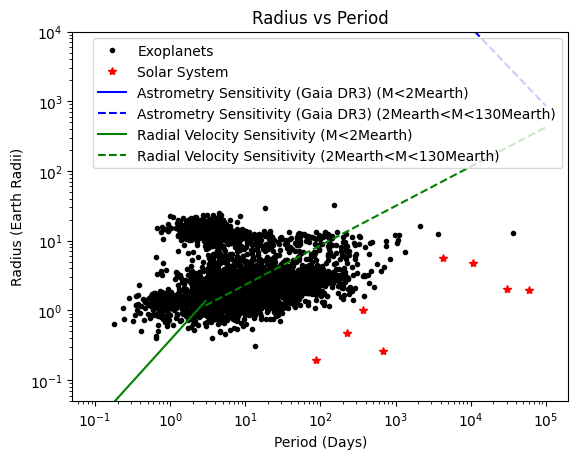

In [17]:
plt.plot(period,radius,'.k',label='Exoplanets')
plt.plot(solperiod,solradius,'r*',label='Solar System')

plt.xlabel('Period (Days)')
plt.ylabel('Radius (Earth Radii)')
plt.xscale('log')
plt.yscale('log')
plt.title('Radius vs Period')


r1 = (0.5 * u.meter / u.second * mstar_avg * u.solMass * np.sqrt( (Parr/365.2422)**(2/3)*u.AU / ac.G / (mstar_avg * u.solMass))).decompose().to(u.earthMass)
r1b = (0.5 * u.meter / u.second * mstar_avg * u.solMass * np.sqrt( (Parr/365.2422)**(2/3)*u.AU / ac.G / (mstar_avg * u.solMass))).decompose().to(u.jupiterMass)*320

r2=1*u.mas/(0.3*u.uas)*mstar_avg**(2/3)*(Parr/365.2422)**-(2/3)*(dist_avg)**1
r2b=1*u.mas/(0.3*u.uas)*mstar_avg**(2/3)*(Parr/365.2422)**-(2/3)*(dist_avg)

plt.plot(Parr[r1<2*u.Mearth],r2[r1<2*u.Mearth]**(1/0.28),c='b',label='Astrometry Sensitivity (Gaia DR3) (M<2Mearth)')
plt.plot(Parr,r2b**(1/0.59),c='b',ls='dashed',label='Astrometry Sensitivity (Gaia DR3) (2Mearth<M<130Mearth)')



plt.plot(Parr[r1<2**0.2*u.Mearth],r1[r1<2**0.2*u.Mearth]**(1/0.28),c='g',label='Radial Velocity Sensitivity (M<2Mearth)')
plt.plot(Parr[(r1>2**0.1*u.Mearth) & (r1<130.3*u.Mearth)],r1b[(r1>2**0.1*u.Mearth) & (r1<130.3*u.Mearth)]**(1/0.59),c='g',ls='dashed',label='Radial Velocity Sensitivity (2Mearth<M<130Mearth)')

plt.ylim(5e-2,1e4)
plt.legend()
plt.savefig('5205plot3p1.jpg',bbox_inches='tight', dpi=350)

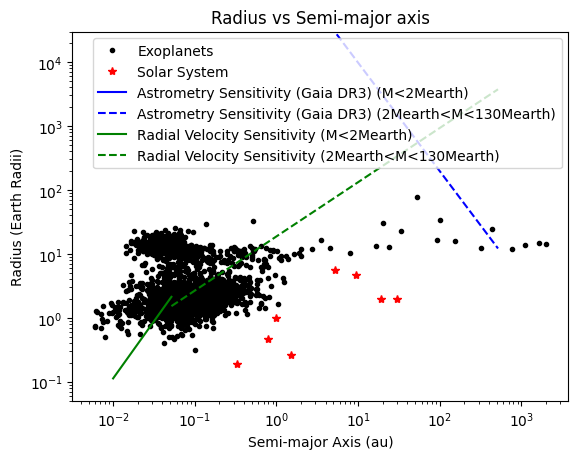

In [18]:
plt.plot(a,radius,'.k',label='Exoplanets')
plt.plot(sola,solradius,'r*',label='Solar System')
plt.xlabel('Semi-major Axis (au)')
plt.ylabel('Radius (Earth Radii)')
plt.xscale('log')
plt.yscale('log')
plt.title('Radius vs Semi-major axis')
aarr=10**np.linspace(-2,5)*u.AU
r1 = (0.5 * u.meter / u.second * mstar_avg * u.solMass * np.sqrt(aarr / ac.G / (mstar_avg * u.solMass))).decompose().to(u.earthMass)
r1b = (0.5 * u.meter / u.second * mstar_avg * u.solMass * np.sqrt(aarr / ac.G / (mstar_avg * u.solMass))).decompose().to(u.jupiterMass)*330


r2=1*u.mas/(0.3*u.uas)*mstar_avg**(2/3)*(aarr)**-(1)*(dist_avg)**1

plt.plot(aarr[r1<2*u.Mearth],r2[r1<2*u.Mearth]**(1/0.28),c='b',label='Astrometry Sensitivity (Gaia DR3) (M<2Mearth)')
plt.plot(aarr[(r1>2*u.Mearth) & (r1<130.3*u.Mearth)],r2[(r1>2*u.Mearth) & (r1<130.3*u.Mearth)]**(1/0.59),c='b',ls='dashed',label='Astrometry Sensitivity (Gaia DR3) (2Mearth<M<130Mearth)')



plt.plot(aarr[r1<2**0.38*u.Mearth],r1[r1<2**0.38*u.Mearth]**(1/0.28),c='g',label='Radial Velocity Sensitivity (M<2Mearth)')
plt.plot(aarr[(r1>2**0.15*u.Mearth) & (r1<130.3*u.Mearth)],r1b[(r1>2**0.15*u.Mearth) & (r1<130.3*u.Mearth)]**(1/0.59),c='g',ls='dashed',label='Radial Velocity Sensitivity (2Mearth<M<130Mearth)')

plt.ylim(5e-2,3e4)
plt.legend()

plt.savefig('5205plot4p1.jpg',bbox_inches='tight', dpi=350)

# **Part II**

In [19]:
#We are calculating detection signals for case 3) a temperate Earth-like planet around a sun-like star- Maya
#detection methods: Astrometry, Direct Imaging, Microlensing, Radial Velocity, Transit. The equations for the signals are taken from the Seager papers

In [20]:
# Method 1: Astrometry
#First, let's define parameters of the star and planet. We can use Earth and Sun's parameters to see how likely it would be to detect a planet like ours
Mass_frac=1
d=500 #Where the most density of planets seems to be based off the semimajor axis plots
Astrometry_signal=3*Mass_frac*1**(-2/3)*1**(2/3)*d**(-1)
print(Astrometry_signal, 'microarcsecs')   #shows an earth-like planet around a sun-like star would not be detectable through astrometry.


0.006 microarcsecs


In [21]:
#Method 2: Direct imaging
# find planet to star contrast as the detection signal- equation 13 in Seager direct imaging
import math
Rratio= 1/109
h=6.626
c=2.998
k_b=1.38
wl= 10 #choose about 10 micrometers because this is mid-infrared and characteristic of Earth-like planets
const= (h*c)/(wl*k_b)
Tsun=5772
Tearth=288
a1=const/Tsun
a2=const/Tearth
b1=math.exp(a1)-1
b2=math.exp(a2)-1
Imaging_signal=Rratio**2 * a1/a2
print(Imaging_signal)

4.199650694053522e-06


In [22]:
#Method 3: Radial velocity
a3=1-0.0167**2
a4=a3**(-1/2)
a5=28.4329*a4
print(a4,a5)
m1=5.97*10**24
m2=1.899*10**27
msun=1.99*10**30
K1=a5*(m1+m2)/msun*1**(-1/3)
print(K1)

1.0001394741741425 28.436865655245978
0.027221796968479362


In [23]:
#Method 4: Transit
Transit_signal= Rratio**2 * 2
print(Transit_signal) #less than the expected max of .02 for Jovian planets, not likely detectable through transits


0.00016833599865331202


In [24]:
mstar_avg

0.9452246520874751